<a href="https://colab.research.google.com/github/AnantaApril/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/April_Aeschbacher_DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [0]:
import pandas as pd
import numpy as np


In [9]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data'
haberman_names = 'Age at operation', 'Year of operation', 'Pos axillary nodes', ' Survival status'
haberman = pd.read_csv(url, header = None, names = haberman_names)
haberman.head()

,Age at operation,Year of operation,Pos axillary nodes,Survival status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [10]:
haberman.isnull().sum()

Age at operation      0
Year of operation     0
Pos axillary nodes    0
 Survival status      0
dtype: int64

In [47]:
haberman.loc[haberman[' Survival status']== 1, 'Amend Survival'] = 1
haberman.loc[haberman[' Survival status']== 2, 'Amend Survival'] = 0
haberman.sample(10)

,Age at operation,Year of operation,Pos axillary nodes,Survival status,Amend Survival,Age range at operation
197,57,61,5,2,0.0,50-60
261,65,66,15,2,0.0,60-70
186,55,66,0,1,1.0,50-60
272,66,68,0,1,1.0,60-70
182,55,58,1,1,1.0,50-60
187,55,69,3,1,1.0,50-60
26,38,60,0,1,1.0,30-40
84,45,67,0,1,1.0,40-50
33,38,67,5,1,1.0,30-40
304,78,65,1,2,0.0,70-80


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [48]:
# I started to compare these two but then noticed that the age range was too large so I binned to age ranges and compared that
results1 = pd.crosstab(haberman['Age at operation'], haberman['Amend Survival'])
results1.sample(10)


Amend Survival,0.0,1.0
Age at operation,,
35,0,2
52,4,10
42,2,7
67,2,4
78,1,0
72,1,3
38,1,9
56,2,5
58,0,7


In [49]:
# get some stats so I know what I am working with
haberman['Age at operation'].describe()


count    306.000000
mean      52.457516
std       10.803452
min       30.000000
25%       44.000000
50%       52.000000
75%       60.750000
max       83.000000
Name: Age at operation, dtype: float64

In [55]:
agebins = [29, 40, 50, 60, 70, 80, 90]
agelabels = ['30-40', '40-50', '50-60', '60-70', '70-80', '80-90']
haberman['Age range at operation'] = pd.cut(haberman['Age at operation'], bins = agebins, labels = agelabels)
results3 = haberman['Age range at operation'].value_counts().sort_index()
results3

30-40    43
40-50    93
50-60    93
60-70    63
70-80    13
80-90     1
Name: Age range at operation, dtype: int64

In [56]:
results_cross = pd.crosstab(haberman['Age range at operation'], haberman['Amend Survival'])
results_cross

Amend Survival,0.0,1.0
Age range at operation,,
30-40,4,39
40-50,29,64
50-60,26,67
60-70,18,45
70-80,3,10
80-90,1,0


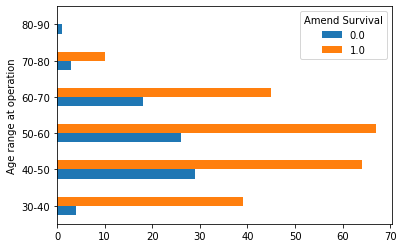

In [57]:
results_cross.plot(kind = 'barh');

In [58]:
haberman.head()

,Age at operation,Year of operation,Pos axillary nodes,Survival status,Amend Survival,Age range at operation
0,30,64,1,1,1.0,30-40
1,30,62,3,1,1.0,30-40
2,30,65,0,1,1.0,30-40
3,31,59,2,1,1.0,30-40
4,31,65,4,1,1.0,30-40


In [59]:
haberman['Pos axillary nodes'].describe()

count    306.000000
mean       4.026144
std        7.189654
min        0.000000
25%        0.000000
50%        1.000000
75%        4.000000
max       52.000000
Name: Pos axillary nodes, dtype: float64

In [60]:
nodebins = [0, 10, 20, 30, 40, 50, 60]
nodelabels = ['under 10', '10-20', '20-30', '30-40', '40-50', 'above 50']
haberman['Axillary nodes range'] = pd.cut(haberman['Pos axillary nodes'], bins = nodebins, labels = nodelabels)
results3 = haberman['Axillary nodes range'].value_counts().sort_index()
results3

under 10    130
10-20        26
20-30        11
30-40         1
40-50         1
above 50      1
Name: Axillary nodes range, dtype: int64

In [61]:
cross2 = pd.crosstab(haberman['Axillary nodes range'], haberman['Amend Survival'])
cross2

Amend Survival,0.0,1.0
Axillary nodes range,,
under 10,39,91
10-20,15,11
20-30,6,5
30-40,1,0
40-50,0,1
above 50,1,0


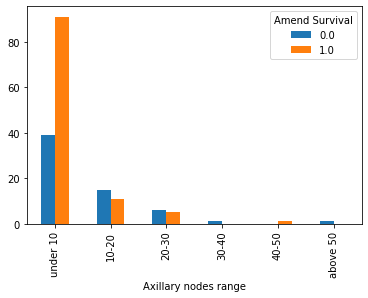

In [64]:
cross2.plot(kind= 'bar');

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?
- What is at least one feature that looks to have a negative relationship with survival?
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

**See above bar chart**  
One feature that seems to have a positive effect on survivability seems to be if they start with fewer than 10 axillary nodes, above 50 tends to have a very negative effect on survivability. Survivabilty tends to go down the higher the number of nodes. My assumption is that the more nodes there are, the less likely you are to survive.